# MS-SMC' validation

This notebook validates the MS-SMC' calculations from McKenzie and Eaton (XXXX) by comparing the analytical predictions to the results of stochastic coalescent simulations.

### Required software

In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
import toytree
import ipcoal
from scipy import stats
import toyplot, toyplot.svg, toyplot.png

In [16]:
S, G, I = ipcoal.msc.get_test_data(nloci=1, nsites=1e4, seed=123)#.src.utils.get_test_data()

In [42]:
S = toytree.rtree.baltree(2, treeheight=5e5)
M = ipcoal.Model(S, nsamples=4, Ne=2e5, seed_trees=123)
M.sim_trees(1, 1e5)
I = M.get_imap_dict()
G = toytree.mtree(M.df.genealogy)
S = M.tree

In [43]:
emb, enc = ipcoal.smc.get_genealogy_embedding_arrays(S, G, I)
ipcoal.msc.get_genealogy_embedding_table(S, G[0], I)

,start,stop,st_node,neff,nedges,dist,gidx,edges
0,0.000000e+00,6.231134e+04,0,200000.0,4,6.231134e+04,0,"[0, 1, 2, 3]"
1,6.231134e+04,1.198118e+05,0,200000.0,3,5.750050e+04,0,"[0, 1, 8]"
2,1.198118e+05,1.718568e+05,0,200000.0,2,5.204498e+04,0,"[0, 9]"
3,1.718568e+05,5.000000e+05,0,200000.0,1,3.281432e+05,0,[10]
4,0.000000e+00,4.033227e+04,1,200000.0,4,4.033227e+04,0,"[4, 5, 6, 7]"
5,4.033227e+04,1.023277e+05,1,200000.0,3,6.199540e+04,0,"[4, 5, 11]"
6,1.023277e+05,5.000000e+05,1,200000.0,2,3.976723e+05,0,"[4, 12]"
7,5.000000e+05,5.542447e+05,2,200000.0,3,5.424468e+04,0,"[4, 10, 12]"
8,5.542447e+05,1.169731e+06,2,200000.0,2,6.154867e+05,0,"[10, 13]"
9,1.169731e+06,inf,2,200000.0,1,inf,0,[14]


In [44]:
probs = [ipcoal.smc.get_prob_tree_unchanged(S, g, I) for g in G]

In [45]:
min(probs), max(probs)

(0.17847361595156605, 0.40466606739633526)

In [46]:
toyplot.plot(probs, height=300);

<svg class="toyplot-canvas-Canvas" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" width="600px" height="300.0px" viewBox="0 0 600 300.0" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" id="te4cc64cbee244d5b8265a15cc2327563"> <path d="M 50.0 138.84739416677755 L 51.66666666666667 136.2537945277682 L 53.33333333333333 149.84677963127228 L 55.0 162.71297725849087 L 56.66666666666667 193.36155020626174 L 58.33333333333333 202.09540265091294 L 60.0 198.8814541196006 L 61.66666666666667 208.42777603227387 L 63.33333333333334 214.93705409615887 L 65.0 215.35972493529204 L 66.66666666666667 212.11033812893513 L 68.33333333333334 222.59045610128143 L 70.0 224.7451622000908 L 71.66666666666667 223.05410421705807 L 73.33333333333334 196.15567512164537 L 75.0 198.07159576539934 L 76.66666666666667 208.52678193955612 L 78.33333333333334 208.85906023649983 L 80.0 194.50368807023273 L 81.66666666666667 182.58876442025704 L 83.33333333333333 165.38686990711875 L 85.0 154.40063019575172 L 86.66666666666666 173.99341297458042 L 88.33333333333333 201.55586742816115 L 90.0 200.50425232017068 L 91.66666666666666 160.23872188015793 L 93.33333333333334 159.83555339597297 L 95.0 156.3838658567157 L 96.66666666666666 158.7592507237364 L 98.33333333333333 165.21117413882467 L 100.0 219.19125999640417 L 101.66666666666667 244.42194195105625 L 103.33333333333334 242.17907215182444 L 105.0 230.32522211485968 L 106.66666666666666 194.9663469403679 L 108.33333333333334 197.22340283267766 L 110.0 189.3294006171654 L 111.66666666666666 209.75340522840835 L 113.33333333333334 197.23787607938033 L 115.0 192.09166378293494 L 116.66666666666666 197.2378760793803 L 118.33333333333331 208.38576398310624 L 120.00000000000001 222.47372426487254 L 121.66666666666669 207.55799122042413 L 123.33333333333334 178.23232637377663 L 125.0 180.43801266037045 L 126.66666666666666 209.02196180302656 L 128.33333333333334 208.9610383281517 L 130.0 185.69401455957407 L 131.66666666666666 199.08287744916345 L 133.33333333333331 185.69401455957407 L 135.0 190.9665255678559 L 136.66666666666669 202.7863414419571 L 138.33333333333334 71.54000883728227 L 140.0 98.43890761519995 L 141.66666666666666 125.91526795583351 L 143.33333333333334 134.53288640428596 L 145.0 134.82497040145418 L 146.66666666666666 147.82410099411314 L 148.33333333333331 148.4138101035877 L 150.0 119.14048223373226 L 151.66666666666669 112.33434332221006 L 153.33333333333334 115.96671028446067 L 155.0 109.0171245599549 L 156.66666666666669 114.34163632520679 L 158.33333333333334 120.2708235565355 L 160.0 118.3204397660318 L 161.66666666666666 120.2708235565355 L 163.33333333333331 135.88040278196567 L 165.0 136.57619595196576 L 166.66666666666669 125.53864812818153 L 168.33333333333331 68.23427709785909 L 170.0 68.22364996542736 L 171.66666666666669 147.47200151538064 L 173.33333333333331 155.29779819006126 L 175.0 166.79227151719542 L 176.66666666666669 182.5794724005814 L 178.33333333333331 199.4483692946236 L 180.0 210.82559335500943 L 181.66666666666666 198.79624696184197 L 183.33333333333331 191.3882857905837 L 185.0 191.37609943678495 L 186.66666666666666 196.59954950835987 L 188.33333333333331 194.88112855511173 L 190.00000000000003 186.4332002218016 L 191.66666666666669 191.32354992734952 L 193.33333333333337 186.97583074989356 L 195.0 186.02847857053374 L 196.66666666666669 195.88460093158383 L 198.33333333333337 184.11850532719058 L 200.0 180.26069735538164 L 201.66666666666669 175.05323065013476 L 203.33333333333331 171.4067262117941 L 205.0 171.55480430770302 L 206.66666666666669 172.58732042164777 L 208.33333333333331 174.4253557633297 L 210.0 170.11818489523355 L 211.66666666666666 165.12

In [51]:
G[20].draw('p');

<svg class="toyplot-canvas-Canvas" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" width="300.0px" height="300.0px" viewBox="0 0 300.0 300.0" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" id="ta00baa73f4d64c2f90659de7dd89cf80"> 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 r0_0 r0_2 r0_3 r1_0 r1_1 r1_2 r1_3 r0_1 0 400000 800000

In [23]:
ipcoal.smc.get_prob_topo_unchanged_given_b(S, g, I, 12)

IndexError: tuple index out of range

In [7]:
g.draw('p');

<svg class="toyplot-canvas-Canvas" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" width="725.5999999999999px" height="346.52400000000006px" viewBox="0 0 725.5999999999999 346.52400000000006" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" id="t3823c44a3b3c41a2b0b1d7d1b920310a"> 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 r1_6 r1_2 r1_5 r1_7 r1_0 r1_1 r1_3 r1_4 r0_7 r0_2 r0_5 r0_0 r0_1 r0_6 r0_3 r0_4 r2_7 r2_2 r2_4 r2_1 r2_5 r2_0 r2_3 r2_6 r3_3 r3_6 r3_5 r3_7 r3_0 r3_2 r3_1 r3_4 0 500000 1000000

In [5]:
for g in G:
    print(ipcoal.smc.get_prob_tree_unchanged(S, g, I))

0.8587786041884709
0.860979289006707
0.8598641241059928
0.8604775075732192
0.8626555742052049
0.8615555021592518
0.8610133282874475
0.8633489567131051
0.8672675766988802
0.8685388169040562
0.8688140049435962
0.8727598545586501
0.8648060372355609
0.8642395439964429
0.8631218632608272
0.8513461246364425
0.8524497108831308
0.8530742219318925
0.8530447935237436
0.8531842751836082
0.8542431839342983
0.859760594024701
0.8609503853876702
0.8460215530300703
0.8461500737639079
0.8460215530300703
0.8461500737639079
0.8525815600892628
0.8504923702701722
0.8502552610680693
0.846601928210599
0.8471910155668188
0.8456211784927712
0.8459649208115447
0.8606593665829871
0.8726650264888343
0.8738476688270784
0.875769710552994
0.8755848416938546
0.8730642713101501
0.8720300826967995
0.8733658702500371
0.8735637319123888
0.8703753756366165
0.8653948784762477
0.8668641834308273
0.8666752650311838
0.869372274892627
0.8770508928272971
0.8784253014886212
0.8784315760107408


In [6]:
G[0].draw('p');

<svg class="toyplot-canvas-Canvas" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" width="725.5999999999999px" height="346.52400000000006px" viewBox="0 0 725.5999999999999 346.52400000000006" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" id="t0bcfabefb4ef4df2ae9ed1c718aa79b5"> 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 r3_5 r3_0 r3_4 r3_3 r3_2 r3_7 r3_1 r3_6 r2_0 r2_2 r2_3 r2_4 r2_6 r2_1 r2_5 r2_7 r1_2 r1_4 r1_0 r1_5 r1_3 r1_6 r1_1 r1_7 r0_2 r0_5 r0_3 r0_7 r0_4 r0_1 r0_0 r0_6 0 500000 1000000

In [6]:
ipcoal.smc.get_prob_topo_unchanged_given_b_and_tr(S, G[0], I, 8, 800_001)

1.0

In [25]:
from ipcoal.smc.src.ms_smc_interval_prob import _get_fij_set_sum

In [40]:
time = 800_500
bidx = 8
sidx = 11
pidx = 12
gemb = emb[0]
genc = enc[0]

# stop > time & start <= time
benc = genc[:, bidx] & (gemb[:, 1] > time)
bidxs = (benc).nonzero()[0]

# require time occurs on branch b (tr >= interval start)
if not (benc & (time >= gemb[:, 0])).sum():
    raise ValueError("No interval exists on branch bidx at time tr.")

# get b and b' together above tr
senc = genc[:, sidx]
sidxs = (benc & senc).nonzero()[0]

# get c
penc = genc[:, pidx]
pidxs = penc.nonzero()[0]

# get b or c above tf
fidxs = (benc | penc).nonzero()[0]
idx = bidxs.min()
idx

# exp(nedges / 2neff) * tr)
inner = (gemb[idx, 4] / (2 * gemb[idx, 3])) * time
inner = np.exp(inner) if inner < 100 else 1e15

term1 = (1 / gemb[idx, 4])

# 
if time < gemb[sidxs, 0].min():
    sumfij_bc = _get_fij_set_sum(gemb, fidxs, fidxs)
    term2 = sumfij_bc * inner

    sumfij_m = _get_fij_set_sum(gemb, fidxs, sidxs)
    term3 = sumfij_m * inner
    print("HI")
    print(term1 + term2 + term3)
else:
    print("NO")
    
    # pij over j all intervals on b
    # term2 = sum(_get_fast_pij(btab, idx, jdx) for jdx in range(btab.shape[0]))
    # term2 *= inner
    sumfij_b = _get_fij_set_sum(gemb, fidxs, bidxs)
    term2 = sumfij_b * inner

    # pij over j all intervals on c
    # term3 = sum(_get_fast_pij(ptab, idx, jdx) for jdx in range(ptab.shape[0]))
    # term3 *= inner
    sumfij_c = _get_fij_set_sum(gemb, fidxs, pidxs)
    term3 = sumfij_c * inner

    print(2 * (term1 + term2), term3)
    print(2 * (term1 + term2) + term3)


NO
0.7744784115572418 0.22552158844275816
1.0


In [75]:
(6 / 50_000) * 1e6, 100_000 * np.exp(100) - np.exp(80)


(120.0, 2.6881171418160802e+48)

In [78]:
enc[0][:, 11]

array([False, False, False, False, False, False, False, False, False,
       False, False,  True, False])

In [10]:
G[0].draw('p');

<svg class="toyplot-canvas-Canvas" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" width="300.0px" height="300.0px" viewBox="0 0 300.0 300.0" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" id="t4f0f36ffe1d845d6ac81d9cfbdea0110"> 0 1 2 3 4 5 6 7 8 9 10 11 12 A_0 A_1 A_2 D_0 C_0 B_0 B_1 0 300000 600000 900000

In [84]:
G[0].draw('p');

<svg class="toyplot-canvas-Canvas" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" width="300.0px" height="300.0px" viewBox="0 0 300.0 300.0" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" id="t0eca799bcb354ae6a9d911486abe1f79"> 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 r0_1 r0_2 r0_3 r1_3 r0_0 r1_1 r1_0 r1_2 0 400000 800000 1200000

In [407]:
g = G[0]

In [406]:
i = g.set_node_data("height", {12: np.random.uniform(max(i.height for i in g[12].children), g[12].up.height)})
i.draw('c', node_labels=True, node_labels_style={"baseline-shift": 10});

<svg class="toyplot-canvas-Canvas" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" width="300.0px" height="300.0px" viewBox="0 0 300.0 300.0" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" id="t093584b2eba942adb925ddfcb1b680d3"> 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 r0_1 r0_2 r0_3 r1_3 r0_0 r1_1 r1_0 r1_2 0 400000 800000 1200000

In [423]:
5 + 1 - 3, 5 - 3 + 1

(3, 3)

In [17]:
ipcoal.smc.get_ms_smc_loglik_from_embedding(T2, 2e-9, Dt, 2, It)

14235.010608334924

In [7]:
from ipcoal.smc.src.embedding import _jit_update_neff
from ipcoal.smc.src.likelihood import faster_likelihood
from ipcoal.smc.src.likelihood import *

In [10]:
%%timeit
faster_likelihood(T1.emb, T1.enc, T1.barr, T1.sarr, T1.rarr, 2e-9, Dg, Dt, It)

95.1 ms ± 1.69 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [11]:
%%timeit
get_ms_smc_loglik_from_embedding(T1, 2e-9, Dg, 1, ) + get_ms_smc_loglik_from_embedding(T1, 2e-9, Dt, 2, It)

92.8 ms ± 2.11 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [35]:
T1.get_table(0).head(5)

,start,stop,st_node,neff,nedges,dist,gidx
0,0.000000,40423.821400,0.0,10000.0,4.0,40423.821400,0.0
1,40423.821400,350482.370294,0.0,10000.0,3.0,310058.548893,0.0
2,350482.370294,500000.000000,0.0,10000.0,2.0,149517.629706,0.0
3,0.000000,8200.845938,1.0,200000.0,4.0,8200.845938,0.0
4,8200.845938,169190.428060,1.0,200000.0,3.0,160989.582123,0.0


In [34]:
_jit_update_neff(T1.emb.copy(), 0, 30000)

array([[[0.00000000e+00, 4.04238214e+04, 0.00000000e+00, ...,
         4.00000000e+00, 4.04238214e+04, 0.00000000e+00],
        [4.04238214e+04, 3.50482370e+05, 0.00000000e+00, ...,
         3.00000000e+00, 3.10058549e+05, 0.00000000e+00],
        [3.50482370e+05, 5.00000000e+05, 0.00000000e+00, ...,
         2.00000000e+00, 1.49517630e+05, 0.00000000e+00],
        ...,
        [5.00000000e+05, 1.01348488e+06, 2.00000000e+00, ...,
         3.00000000e+00, 5.13484876e+05, 0.00000000e+00],
        [1.01348488e+06, 1.05907257e+06, 2.00000000e+00, ...,
         2.00000000e+00, 4.55876934e+04, 0.00000000e+00],
        [1.05907257e+06,            inf, 2.00000000e+00, ...,
         1.00000000e+00,            inf, 0.00000000e+00]],

       [[0.00000000e+00, 4.04238214e+04, 0.00000000e+00, ...,
         4.00000000e+00, 4.04238214e+04, 1.00000000e+00],
        [4.04238214e+04, 3.50482370e+05, 0.00000000e+00, ...,
         3.00000000e+00, 3.10058549e+05, 1.00000000e+00],
        [3.50482370e+05, 

In [66]:
y = stats.invgamma.freeze(a=20, scale=2e5 * 19)
y.interval(0.99), y.logpdf(2e5), y.logpdf(3e5)

((113830.4577867388, 367033.8800606301),
 -11.657177249400855,
 -13.838611186338978)

In [67]:
y = stats.invgamma.freeze(a=5, scale=2e5 * 4)
y.interval(0.99), y.logpdf(2e5), y.logpdf(3e5)

((63521.85934788409, 742164.4315728026),
 -12.452654670278667,
 -13.552111985594319)

In [68]:
y = stats.invgamma.freeze(a=3, scale=2e5 * 2)
y.interval(0.99), y.logpdf(2e5), y.logpdf(3e5)

((43132.30188365266, 1183910.4601011956),
 -12.819778284410283,
 -13.774972050176274)

In [53]:
stats.invgamma.logpdf(x=2e5, a=2, scale=2e5 * 1)

-13.206072645530174

In [44]:
# 2e5 = 5 / a-1
# 2e5 * (a-1) = 5
# a2e5 - 2e5 = 5
# a2e5 = 5 + 2e5
# a = 5/2e5 + 1
stats.invgamma(a=5, scale=1000).mean()

250.0

In [48]:
stats.invgamma(a=5, scale=4 * 2e5).mean()

200000.0

In [299]:
a = np.ma.array([1, 1, 1, 0, 0], mask=np.bincount([3,4], minlength=5))

for i in a.mask:
    print(i)

False
False
False
True
True


In [214]:
G[0].draw('p');

<svg class="toyplot-canvas-Canvas" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" width="300.0px" height="300.0px" viewBox="0 0 300.0 300.0" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" id="t5f38b67166da46829aa0c12a3d127459"> 0 1 2 3 4 5 6 7 8 9 10 11 12 D_0 C_0 B_1 A_2 A_0 A_1 B_0 0 500000 1000000

In [216]:
ipcoal.smc.get_genealogy_embedding_arrays(S, G, I)[0][0]

array([[0.00000000e+00, 2.00000000e+05, 0.00000000e+00, 1.00000000e+05,
        3.00000000e+00, 2.00000000e+05, 0.00000000e+00],
       [0.00000000e+00, 2.00000000e+05, 1.00000000e+00, 1.00000000e+05,
        2.00000000e+00, 2.00000000e+05, 0.00000000e+00],
       [0.00000000e+00, 4.00000000e+05, 2.00000000e+00, 1.00000000e+05,
        1.00000000e+00, 4.00000000e+05, 0.00000000e+00],
       [0.00000000e+00, 6.00000000e+05, 3.00000000e+00, 1.00000000e+05,
        1.00000000e+00, 6.00000000e+05, 0.00000000e+00],
       [2.00000000e+05, 2.14322379e+05, 4.00000000e+00, 1.00000000e+05,
        5.00000000e+00, 1.43223793e+04, 0.00000000e+00],
       [2.14322379e+05, 2.45152122e+05, 4.00000000e+00, 1.00000000e+05,
        4.00000000e+00, 3.08297423e+04, 0.00000000e+00],
       [2.45152122e+05, 2.49108247e+05, 4.00000000e+00, 1.00000000e+05,
        3.00000000e+00, 3.95612531e+03, 0.00000000e+00],
       [2.49108247e+05, 3.64896078e+05, 4.00000000e+00, 1.00000000e+05,
        2.00000000e+00, 1

In [190]:
#new_get_ms_smc_data_from_model(M)

In [171]:
ntrd[:10], ntrd[-10:]

(array([ 617,  126,   94,   65, 3394, 1956,  194,  272, 1382,  635]),
 array([  28,  637,   96, 1820, 1687,  731, 1523,  273,   94,  276]))

In [164]:
ntidxs[:10], ntod[:10]

(array([ 0,  2,  7,  9, 10, 11, 12, 13, 14, 18]),
 array([ 743, 5703, 1654,  635,   62, 1697, 3022,  149, 2468, 4335]))

In [160]:
tidxs[-10:]

array([1688, 1690, 1693, 1694, 1697, 1698, 1699, 1701, 1702, 1704])

In [165]:
ntrees[0].draw();
ntrees[1].draw();

<svg class="toyplot-canvas-Canvas" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" width="300.0px" height="275.0px" viewBox="0 0 300.0 275.0" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" id="t3a3d112420554a85b76f7f5e3aa45703"> D_0 C_0 A_2 B_0 B_1 A_0 A_1

<svg class="toyplot-canvas-Canvas" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" width="300.0px" height="275.0px" viewBox="0 0 300.0 275.0" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" id="ta725404be4174ef0bbdcf3fce990a742"> D_0 C_0 A_2 B_0 B_1 A_0 A_1

In [116]:
M.df.head(20)

,locus,start,end,nbps,nsnps,tidx,genealogy
0,0,0,138,138,0,0,((C_0:556339.17763828602...
1,0,138,555,417,0,1,((C_0:556339.17763828602...
2,0,555,963,408,0,2,((C_0:556339.17763828602...
3,0,963,1340,377,0,3,((D_0:798969.69965539244...
4,0,1340,1660,320,0,4,((C_0:400918.86528552009...
5,0,1660,1988,328,0,5,((A_0:235915.38876688084...
6,0,1988,2052,64,0,6,((D_0:626000.11064675473...
7,0,2052,2115,63,0,7,((D_0:626000.11064675473...
8,0,2115,2244,129,0,8,((D_0:626000.11064675473...
9,0,2244,2257,13,0,9,((D_0:626000.11064675473...


In [11]:
def old_get_ms_smc_data_from_model(model: ipcoal.Model):
    """Return tree and topo change data"""
    trees = []
    tree_spans = []
    topo_idxs = []
    topo_spans = []

    gidx = 0
    tidx = 0
    iterator = ipcoal.smc.src.utils.iter_spans_and_trees_from_model(model)
    span, gtree = next(iterator)
    current = gtree.get_topology_id(include_root=True)
    intervals = [span]

    # store the first tree
    tree_spans.append(span)
    trees.append(gtree)

    # iterate over all subsequent trees
    for (span, gtree) in iterator:
        tree_spans.append(span)
        trees.append(gtree)
        new = gtree.get_topology_id(include_root=True)
        gidx += 1

        # if topo change occurred store last tree
        if current != new:
            topo_idxs.append(tidx)
            topo_spans.append(sum(intervals))
            current = new
            intervals = [span]
            tidx = gidx
        else:
            intervals.append(span)
    return np.array(tree_spans), np.array(topo_spans), np.array(topo_idxs), trees

In [14]:
trd, tod, tidxs, trees = old_get_ms_smc_data_from_model(M)

In [4]:
tree_dists, topo_dists, topo_idxs, trees = ipcoal.smc.src.utils.get_ms_smc_data_from_model(M)

In [5]:
T = ipcoal.smc.TreeEmbedding(M.tree, trees, M.get_imap_dict())

In [6]:
emb, enc, barr, sarr, rarr = T.get_data()

In [10]:
from typing import Optional
from ipcoal.smc.src.likelihood import *
from numba import njit, prange, set_num_threads, set_parallel_chunksize
from ipcoal.smc.src.ms_smc_topo_prob import get_prob_topo_unchanged_from_arrays, get_topo_changed_lambdas
from ipcoal.smc.src.ms_smc_tree_prob import get_prob_tree_unchanged_from_arrays
set_num_threads(4)

In [38]:
@njit(parallel=True)
def faster_likelihood(
    emb: np.ndarray,
    enc: np.ndarray,
    barr: np.ndarray,
    sarr: np.ndarray,
    rarr: np.ndarray,
    recombination_rate: float,
    tree_lengths: np.ndarray,
    topo_lengths: np.ndarray,
    topo_idxs: np.ndarray = None,
) -> float:
    """
    """
    # ...
    sum_neg_loglik = 0.
    tidx = 0
    for gidx in prange(emb.shape[0]):
        x = 0
        gemb = emb[gidx]
        genc = enc[gidx]
        blens = barr[gidx]
        sumlen = sarr[gidx]

        prob_un_tree = get_prob_tree_unchanged_from_arrays(gemb, genc, blens, sumlen)
        lambda_tree = sumlen * (1 - prob_un_tree) * recombination_rate
        sum_neg_loglik += -np.log(lambda_tree * np.exp(-lambda_tree * tree_lengths[gidx]))

#         if gidx in topo_idxs:
#             relate = rarr[gidx]
#             prob_un_topo = get_prob_topo_unchanged_from_arrays(gemb, genc, blens, sumlen, relate)
#             lambda_topo = sumlen * (1 - prob_un_topo) * recombination_rate
#             x = -np.log(lambda_topo * np.exp(-lambda_topo * topo_lengths[tidx]))
#             tidx += 1
#         sum_neg_loglik += x + y
    return sum_neg_loglik


In [39]:
faster_likelihood(
    emb, enc, barr, sarr, rarr, 2e-9, tree_dists, topo_dists, topo_idxs,
)

13013.583330751564

In [13]:
%%timeit
faster_likelihood(
    emb, enc, barr, sarr, rarr, 2e-9, tree_dists, topo_dists, topo_idxs,
)

53.4 ms ± 841 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [8]:

@njit  # (parallel=True)
def faster_likelihood(
    emb: np.ndarray,
    enc: np.ndarray,
    barr: np.ndarray,
    sarr: np.ndarray,
    rarr: np.ndarray,
    recombination_rate: float,
    lengths: np.ndarray,
    event_type: int = 1,
    idxs: Optional[np.ndarray] = None,
) -> float:
    """
    """
    if idxs is None:
        idxs = np.arange(lengths.size)

    # ...
    sum_neg_loglik = 0.
    #for idx in prange(idxs.size):
    for idx, gidx in enumerate(idxs):
        gidx = idxs[idx]
        gemb = emb[gidx]
        genc = enc[gidx]
        blens = barr[gidx]
        sumlen = sarr[gidx]
        relate = rarr[gidx]
        prob_un_topo = get_prob_topo_unchanged_from_arrays(gemb, genc, blens, sumlen, relate)
        lambda_ = sumlen * (1 - prob_un_topo) * recombination_rate
        sum_neg_loglik += -np.log(lambda_ * np.exp(-lambda_ * lengths[idx]))
    return sum_neg_loglik


@njit(parallel=True, fastmath=True)
def faster_likelihood2(
    emb: np.ndarray,
    enc: np.ndarray,
    barr: np.ndarray,
    sarr: np.ndarray,
    rarr: np.ndarray,
    recombination_rate: float,
    lengths: np.ndarray,
    event_type: int = 1,
    idxs: Optional[np.ndarray] = None,
) -> float:
    """
    """
    if idxs is None:
        idxs = np.arange(lengths.size)

    # ...
    sum_neg_loglik = 0.
    #for idx in prange(idxs.size):
    for idx, gidx in enumerate(idxs):
        gidx = idxs[idx]
        gemb = emb[gidx]
        genc = enc[gidx]
        blens = barr[gidx]
        sumlen = sarr[gidx]
        relate = rarr[gidx]
        prob_un_topo = get_prob_topo_unchanged_from_arrays(gemb, genc, blens, sumlen, relate)
        lambda_ = sumlen * (1 - prob_un_topo) * recombination_rate
        sum_neg_loglik += -np.log(lambda_ * np.exp(-lambda_ * lengths[idx]))
    return sum_neg_loglik


In [30]:
ipcoal.smc.src.likelihood.faster_likelihood(
    emb, enc, barr, sarr, rarr, 2e-9, tree_dists, topo_dists, topo_idxs,
)

2156.2278291130556

In [15]:
%%timeit
ipcoal.smc.src.likelihood.faster_likelihood(
    emb, enc, barr, sarr, rarr, 2e-9, tree_dists, topo_dists, topo_idxs,
)

4.49 ms ± 93 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [10]:
faster_likelihood2(emb, enc, barr, sarr, rarr, 2e-9, topo_dists, event_type=2, idxs=topo_idxs)

675.5566369497618

In [11]:
%%timeit -n 10 -r 10 
faster_likelihood2(emb, enc, barr, sarr, rarr, 2e-9, topo_dists, event_type=2, idxs=topo_idxs)

1.91 ms ± 79.9 µs per loop (mean ± std. dev. of 10 runs, 10 loops each)


In [26]:
faster_likelihood(emb, enc, barr, sarr, rarr, 2e-9, topo_dists, event_type=2, idxs=topo_idxs) + faster_likelihood(emb, enc, barr, sarr, rarr, 2e-9, tree_dists, event_type=1)

2033.0885330902834

In [13]:
%%timeit -n 10 -r 10 
faster_likelihood(emb, enc, barr, sarr, rarr, 2e-9, topo_dists, event_type=2, idxs=topo_idxs)

2.04 ms ± 135 µs per loop (mean ± std. dev. of 10 runs, 10 loops each)


In [28]:
ipcoal.smc.get_ms_smc_loglik_from_embedding(T, 2e-9, topo_dists, event_type=2, idxs=topo_idxs)

31673.599850705737

In [29]:
%%timeit -n 10 -r 10
ipcoal.smc.get_ms_smc_loglik_from_embedding(T, 2e-9, topo_dists, event_type=2, idxs=topo_idxs)

102 ms ± 3.85 ms per loop (mean ± std. dev. of 10 runs, 10 loops each)


In [30]:
ipcoal.smc.get_ms_smc_loglik_from_embedding(T, 2e-9, tree_dists, event_type=1)

64376.95105078448

In [32]:
%%timeit
ipcoal.smc.get_ms_smc_loglik_from_embedding(T, 2e-9, tree_dists, event_type=1)

89.1 ms ± 1.87 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [59]:
%%timeit -n 20 -r 20
rates = get_topo_changed_lambdas(emb, enc, barr, sarr, rarr, 2e-9, idxs=topo_idxs)
#logliks = stats.expon.logpdf(scale=1 / rates, x=topo_dists)
#-np.sum(logliks)

17.3 ms ± 596 µs per loop (mean ± std. dev. of 20 runs, 20 loops each)


In [54]:
faster_likelihood(emb, enc, barr, sarr, rarr, 2e-9, topo_dists, event_type=2, idxs=topo_idxs)

6331.888964204151

### Fetch results files

This notebook assumes you have already run the external Python script `validate-ms-smc.py` to create a folder full of results files. These files are available pre-generated for the example species trees demonstrated in the paper on the GitHub repo, and used here.


In [2]:
# %%bash
# python [waiting-distances-repo-folder]/batch-scripts/validate-2.py

In [4]:
RESULTS_DIR = Path("../batch-scripts/")
RESULTS_FILES = sorted(RESULTS_DIR.glob("validate-10K-npops[1-9]*.npy"))
RESULTS_DICT = {i.name.split("-", 1)[1].split(".")[0]: i for i in RESULTS_FILES}
RESULTS_DICT

{'10K-npops1-nsamps8-full': PosixPath('../batch-scripts/validate-10K-npops1-nsamps8-full.npy'),
 '10K-npops1-nsamps8-smc': PosixPath('../batch-scripts/validate-10K-npops1-nsamps8-smc.npy'),
 '10K-npops2-nsamps4-full': PosixPath('../batch-scripts/validate-10K-npops2-nsamps4-full.npy'),
 '10K-npops2-nsamps4-smc': PosixPath('../batch-scripts/validate-10K-npops2-nsamps4-smc.npy'),
 '10K-npops2-nsamps8-full': PosixPath('../batch-scripts/validate-10K-npops2-nsamps8-full.npy'),
 '10K-npops2-nsamps8-smc': PosixPath('../batch-scripts/validate-10K-npops2-nsamps8-smc.npy'),
 '10K-npops8-nsamps1-full': PosixPath('../batch-scripts/validate-10K-npops8-nsamps1-full.npy'),
 '10K-npops8-nsamps1-smc': PosixPath('../batch-scripts/validate-10K-npops8-nsamps1-smc.npy'),
 '10K-npops8-nsamps3-full': PosixPath('../batch-scripts/validate-10K-npops8-nsamps3-full.npy'),
 '10K-npops8-nsamps3-smc': PosixPath('../batch-scripts/validate-10K-npops8-nsamps3-smc.npy')}

### Parameters
These are global parameters used for analyses in the manuscript. The NLOCI variable is changed further below.

In [5]:
# global parameters (same as in validate-ms-smc.py)
RECOMB = 2e-9
SPECIES_TREE_HEIGHT = 1e6
NEFF_MIN = 50_000
NEFF_MAX = 500_000
NEFF_VALS = 10
SEED = 123
NLOCI = 100
NREPS = 100

### Helper function

In [6]:
def get_sptree(ntips: int, height: float) -> toytree.ToyTree:
    """Return balanced tree with ntips and even internal branch lengths.
    """
    if ntips == 1:
        sptree = toytree.tree("(a);")
    else:
        sptree = toytree.rtree.baltree(ntips)
    sptree = sptree.mod.edges_scale_to_root_height(height, include_stem=True)
    return sptree

### Demonstration that `ancestry_model` has very small effect on simulated waiting distances

The SMC' does not consistently yield longer waiting distances than the Hudson model.

In [627]:
for neff in [5e4, 2e5, 1e6]:
    print(f"Ne={int(neff)}")
    for ntips, nsamples in [(1, 8), (2, 4), (8, 1)]:

        sptree = get_sptree(ntips=ntips, height=1e6)
        m0 = ipcoal.Model(sptree, nsamples=nsamples, Ne=neff, recomb=2e-9, seed_trees=123, ancestry_model="hudson", discrete_genome=False)
        m1 = ipcoal.Model(sptree, nsamples=nsamples, Ne=neff, recomb=2e-9, seed_trees=123, ancestry_model="smc_prime", discrete_genome=False)

        m0.sim_trees(nloci=5, nsites=1e6)
        m1.sim_trees(nloci=5, nsites=1e6)

        print(f"ntips={ntips}, nsamples={nsamples}, model='hudson'   , ntrees={m0.df.shape[0]}, tree-change dist mean={m0.df.nbps.mean():.2f}, std={m0.df.nbps.std():.2f}")
        print(f"ntips={ntips}, nsamples={nsamples}, model='smc_prime', ntrees={m1.df.shape[0]}, tree-change dist mean={m1.df.nbps.mean():.2f}, std={m1.df.nbps.std():.2f}")
    print("")

Ne=50000
ntips=1, nsamples=8, model='hudson'   , ntrees=3896, tree-change dist mean=1283.37, std=1526.29
ntips=1, nsamples=8, model='smc_prime', ntrees=4059, tree-change dist mean=1231.83, std=1443.32
ntips=2, nsamples=4, model='hudson'   , ntrees=8213, tree-change dist mean=608.79, std=682.55
ntips=2, nsamples=4, model='smc_prime', ntrees=7942, tree-change dist mean=629.56, std=667.96
ntips=8, nsamples=1, model='hudson'   , ntrees=17729, tree-change dist mean=282.02, std=287.19
ntips=8, nsamples=1, model='smc_prime', ntrees=17779, tree-change dist mean=281.23, std=278.50

Ne=200000
ntips=1, nsamples=8, model='hudson'   , ntrees=15659, tree-change dist mean=319.31, std=382.62
ntips=1, nsamples=8, model='smc_prime', ntrees=16005, tree-change dist mean=312.40, std=368.90
ntips=2, nsamples=4, model='hudson'   , ntrees=29197, tree-change dist mean=171.25, std=181.00
ntips=2, nsamples=4, model='smc_prime', ntrees=29345, tree-change dist mean=170.39, std=180.32
ntips=8, nsamples=1, model='hu

## Measuring error

Error in analytical estimates is measured with the equation below.

$$ \text{pct_error} = \frac{simulated - analytical}{analytical} * 100 $$


## Plot error distributions

In [27]:
def load_errors(basename: str) -> pd.DataFrame:
    """Return the errors from the SMC' approximation.
    
    # results in arrays
    # 0 = smc_tree_probs (prob tree-change)
    # 1 = smc_topo_probs (prob topo-change)
    # 2 = smc_tree_dists (theoretical prediction of tree dist)
    # 3 = smc_topo_dists (theoretical prediction of topo dist)
    # 4 = sim_tree_dists (simulated tree dist)
    # 5 = sim_topo_dists (simulated topo dist)
    # 6 = sum_edge_lengths (sum edges on first tree)
    # 7 = event type     (first event (0,1,2) = (no,tree,topo))
    """
    res0 = np.load(RESULTS_DICT[basename + "-full"])  
    res1 = np.load(RESULTS_DICT[basename + "-smc"])  
    
    newdata = pd.DataFrame(
        data={
            # HUDSON SIMS
            'fullsim_minus_prediction_tree_error_perc': 100 * np.mean(
                (res0[:, :, 4] - res0[:, :, 2]) / res0[:, :, 2], axis=0),
            'fullsim_minus_prediction_tree_error_perc_sem': 100 * stats.sem(
                (res0[:, :, 4] - res0[:, :, 2]) / res0[:, :, 2], axis=0),
            # TOPO
            'fullsim_minus_prediction_topo_error_perc': 100 * np.mean(
                (res0[:, :, 5] - res0[:, :, 3]) / res0[:, :, 3], axis=0),  
            'fullsim_minus_prediction_topo_error_perc_sem': 100 * stats.sem(
                (res0[:, :, 5] - res0[:, :, 3]) / res0[:, :, 3], axis=0),
            
            # SMC' SIMS
            'smcsim_minus_prediction_tree_error_perc': 100 * np.mean(
                (res1[:, :, 4] - res1[:, :, 2]) / res1[:, :, 2], axis=0), 
            'smcsim_minus_prediction_tree_error_perc_sem': 100 * stats.sem(
                (res1[:, :, 4] - res1[:, :, 2]) / res1[:, :, 2], axis=0),
            # TOPO
            'smcsim_minus_prediction_topo_error_perc': 100 * np.mean(
                (res1[:, :, 5] - res1[:, :, 3]) / res1[:, :, 3], axis=0), 
            'smcsim_minus_prediction_topo_error_perc_sem': 100 * stats.sem(
                (res1[:, :, 5] - res1[:, :, 3]) / res1[:, :, 3], axis=0),
        },
        index=np.linspace(NEFF_MIN, NEFF_MAX, NEFF_VALS).astype(int),
    )
    return newdata

In [37]:
load_errors("10K-npops1-nsamps8").T

,50000,100000,150000,200000,250000,300000,350000,400000,450000,500000
fullsim_minus_prediction_tree_error_perc,-0.818457,0.956502,-1.443357,1.940451,0.197715,0.849567,0.730419,0.420761,0.039295,1.356019
fullsim_minus_prediction_tree_error_perc_sem,0.999245,1.002616,0.977509,1.012331,1.023856,1.006894,1.000365,1.002335,1.003027,1.008528
fullsim_minus_prediction_topo_error_perc,2.125146,1.770555,-1.714523,0.891690,0.301595,2.131144,0.284212,0.522491,0.201221,1.165195
fullsim_minus_prediction_topo_error_perc_sem,1.048919,1.044992,1.003397,1.044153,1.030219,1.032357,1.020242,1.036022,1.026230,1.023331
smcsim_minus_prediction_tree_error_perc,0.062305,0.760805,-0.974521,0.921722,0.014065,-0.596469,-0.657071,1.707058,1.723097,1.009881
smcsim_minus_prediction_tree_error_perc_sem,1.004147,1.030217,0.975496,1.012020,1.009092,0.984379,0.977933,1.015555,1.035582,1.006885
smcsim_minus_prediction_topo_error_perc,0.523159,0.188470,-1.177218,0.736077,1.102939,0.307360,-0.779441,1.192618,1.804706,-0.250228
smcsim_minus_prediction_topo_error_perc_sem,1.048067,1.002175,0.996440,1.046274,1.035721,1.005507,1.025890,1.035064,1.030733,1.027827


In [38]:
load_errors("10K-npops2-nsamps4").T

,50000,100000,150000,200000,250000,300000,350000,400000,450000,500000
fullsim_minus_prediction_tree_error_perc,1.489096,3.216307,1.795923,0.309602,0.229650,1.270944,1.754486,0.885147,-0.325753,0.303097
fullsim_minus_prediction_tree_error_perc_sem,1.032519,1.046618,1.012062,1.012564,1.025707,1.005130,1.028901,1.007023,0.975753,0.997100
fullsim_minus_prediction_topo_error_perc,0.119558,1.919113,2.315844,2.320660,2.421339,2.580869,4.569438,0.227139,2.204181,1.499336
fullsim_minus_prediction_topo_error_perc_sem,1.050538,1.082004,1.075396,1.086484,1.073368,1.054955,1.076683,1.011598,1.042136,1.040457
smcsim_minus_prediction_tree_error_perc,-0.559784,-1.592196,-1.965602,-0.039471,-1.423043,-0.204488,0.965732,-0.893596,1.004862,-0.868722
smcsim_minus_prediction_tree_error_perc_sem,1.005573,0.981344,0.987571,0.999416,0.969305,0.986015,1.012141,0.990200,1.012710,0.983991
smcsim_minus_prediction_topo_error_perc,3.427864,0.099593,0.418847,1.832905,-1.479494,0.135458,1.836996,-0.278310,0.734718,-0.399202
smcsim_minus_prediction_topo_error_perc_sem,1.073271,1.062035,1.069494,1.061396,1.003128,1.016484,1.050822,1.018079,1.004570,1.018565


In [39]:
load_errors("10K-npops8-nsamps1").T

,50000,100000,150000,200000,250000,300000,350000,400000,450000,500000
fullsim_minus_prediction_tree_error_perc,1.721024,-0.495731,-1.675440,0.871943,-0.153291,-0.885048,-0.164241,1.738762,-0.464897,-2.767313
fullsim_minus_prediction_tree_error_perc_sem,1.014651,0.994425,0.978777,1.015848,1.004238,0.989067,1.007890,1.026997,0.990102,0.963061
fullsim_minus_prediction_topo_error_perc,5.673089,4.193936,2.849011,3.419133,2.026494,0.232344,-0.065511,1.834750,-0.115749,-0.487619
fullsim_minus_prediction_topo_error_perc_sem,1.220736,1.091614,1.079707,1.059255,1.048910,1.026254,1.024010,1.046803,1.024696,1.000567
smcsim_minus_prediction_tree_error_perc,1.455710,1.372569,1.729509,0.821484,0.163714,-0.015547,-0.623955,-0.696247,0.348497,-0.755187
smcsim_minus_prediction_tree_error_perc_sem,1.008721,1.021017,1.022206,1.017741,1.005084,1.001696,0.996598,0.979371,0.985984,0.980269
smcsim_minus_prediction_topo_error_perc,0.754458,0.816780,1.623343,-1.053857,0.988523,-0.740682,0.848608,-0.732380,-0.885528,0.517688
smcsim_minus_prediction_topo_error_perc_sem,1.028043,1.004477,1.028688,0.986014,1.016588,0.994335,1.016495,0.988656,0.976079,1.001267


In [40]:
load_errors("10K-npops8-nsamps3").T

,50000,100000,150000,200000,250000,300000,350000,400000,450000,500000
fullsim_minus_prediction_tree_error_perc,0.720713,1.030906,-0.006548,0.075239,0.353641,-1.412131,-0.665579,0.573737,-0.517698,1.828143
fullsim_minus_prediction_tree_error_perc_sem,1.005558,1.020015,0.999250,0.992619,1.002566,0.987727,0.970150,1.004649,0.997377,1.026543
fullsim_minus_prediction_topo_error_perc,2.400826,0.695165,-0.368902,1.936123,-0.426838,0.025123,-0.517033,1.305721,-1.011415,0.577410
fullsim_minus_prediction_topo_error_perc_sem,1.049186,1.002509,0.994365,1.014024,0.972501,1.009975,1.005284,1.025241,0.983283,0.997722
smcsim_minus_prediction_tree_error_perc,0.355175,-2.139496,0.410936,-0.381582,0.249957,-0.292944,-0.323702,-3.608617,-0.116724,0.935303
smcsim_minus_prediction_tree_error_perc_sem,1.021964,0.978872,1.008713,0.995451,1.004493,1.015767,0.998898,0.957582,0.984339,0.989407
smcsim_minus_prediction_topo_error_perc,1.969416,-0.972422,0.641737,-0.988679,0.344129,0.033810,0.719370,-2.491598,0.941831,0.351809
smcsim_minus_prediction_topo_error_perc_sem,1.049289,1.009616,1.005606,0.992374,0.995943,1.027973,1.010035,0.966266,0.995938,0.989790


### MCMC test

In [589]:
sptree = get_sptree(2, 1e6)
params = np.array([2e5, 4e5, 3e5])
sptree.set_node_data("Ne", data=params, inplace=True)
model = ipcoal.Model(sptree, nsamples=4, recomb=2e-9, seed_trees=123)
imap = model.get_imap_dict()
model.sim_trees(1, 1e5)
trees = toytree.mtree(model.df.genealogy)
tree_spans = model.df.nbps

topos, topo_spans = zip(*ipcoal.smc.src.utils.iter_topos_and_spans_from_model(model))
G = ipcoal.smc.TreeEmbedding(sptree, trees, imap, nproc=1)
T = ipcoal.smc.TreeEmbedding(sptree, topos, imap, nproc=1)

In [21]:
farr = np.load(RESULTS_DICT["10K-npops1-nsamps8-full"])
sarr = np.load(RESULTS_DICT["10K-npops1-nsamps8-smc"])
plot_error_distributions(farr, sarr, topo=True);

<svg class="toyplot-canvas-Canvas" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" width="500.0px" height="450.0px" viewBox="0 0 500.0 450.0" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" id="tde5e411e96414491b30b6173386ebdfc"> <polygon points="65.0,513.4915412717351 65.0,507.5900289819623 65.0,501.6885166921897 65.0,495.7870044024171 65.0,489.8854921126445 65.0,483.9839798228718 65.0,478.08246753309913 65.0,472.18095524332654 65.0,466.2794429535539 65.0,460.3779306637813 65.0,454.4764183740087 65.0,448.57490608423603 65.0,442.67339379446344 65.0,436.7718815046908 65.0,430.8703692149181 65.0,424.96885692514553 65.0,419.0673446353729 65.0,413.1658323456003 65.0,407.2643200558276 65.0,401.362807766055 65.0,395.46129547628243 65.0,389.5597831865097 65.0,383.6582708967371 65.0,377.7567586069645 65.0,371.85524631719187 65.0,365.9537340274192 65.0,360.0522217376466 65.0,354.15070944787396 65.0,348.24919715810137 65.0,342.3476848683287 65.0,336.44617257855606 65.0,330.54466028878346 65.0,324.6431479990108 65.0,318.7416357092382 65.0,312.8401234194656 65.0,306.93861112969296 65.0,301.03709883992036 65.0,295.13558655014765 65.0,289.23407426037505 65.0,283.33256197060246 65.0,277.4310496808298 65.0,271.5295373910572 65.0,265.6280251012845 65.0,259.7265128115119 65.0,253.8250005217393 65.0,247.92348823196662 65.0,242.021975942194 65.0,236.12046365242136 65.0,230.21895136264874 65.0,224.3174390728761 65.0,218.4159267831035 65.0,212.5144144933309 65.0,206.61290220355824 65.0,200.7113899137856 65.0,194.80987762401298 65.0,188.90836533424033 65.0,183.00685304446773 65.0,177.1053407546951 65.0,171.20382846492245 65.0,165.30231617514983 65.0,159.4008038853772 65.0,153.49929159560457 65.0,147.59777930583195 65.0,141.69626701605932 65.0,135.79475472628667 65.0,129.89324243651407 65.0,123.99173014674145 65.0,118.09021785696882 65.0,112.1887055671962 65.0,106.28719327742357 65.0,100.38568098765094 65.0,94.48416869787823 65.0,88.58265640810562 65.0,82.68114411833298 65.0,76.77963182856035 65.0,70.87811953878773 65.0,64.97660724901515 65.0,59.07509495924251 65.0,53.173582669469894 65.0,47.27207037969726 65.0,41.37055808992464 65.0,35.469045800152024 65.0,29.567533510379384 65.0,23.666021220606765 65.0,17.76450893083406 65.0,11.862996641061443 65.0,5.961484351288817 65.0,0.05997206151619139 65.0,-5.841540228256434 65.0,-11.743052518028989 65.0,-17.644564807801757 65.0,-23.546077097574383 65.0,-29.44758938734701 65.0,-35.349101677119634 65.0,-41.25061396689226 65.0,-47.1521262566649 65.0,-53.0536385464375 65.0,-58.95515083621014 65.0,-64.85666312598276 65.0,-70.7581754157554 65.01758889522723,-70.7581754157554 65.0,-64.85666312598276 65.0,-58.95515083621014 65.0,-53.0536385464375 65.0,-47.1521262566649 65.01758889522723,-41.25061396689226 65.0,-35.349101677119634 65.0,-29.44758938734701 65.0,-23.546077097574383 65.0,-17.644564807801757 65.01758889522723,-11.743052518028989 65.01758889522723,-5.841540228256434 65.0,0.05997206151619139 65.0,5.961484351288817 65.0,11.862996641061443 65.0,17.76450893083406 65.0,23.666021220606765 65.01758889522723,29.567533510379384 65.01758889522723,35.469045800152024 65.01758889522723,41.37055808992464 65.05276668568169,47.27207037969726 65.01758889522723,53.173582669469894 65.03517779045445,59.07509495924251 65.05276668568169,64.97660724901515 65.03517779045445,70.87811953878773 65.03517779045445,76.77963182856035 65.01758889522723,82.68114411833298 65.07035558090892,88.58265640810562 65.05276668568169,94.48416869787823 65.10553337136338,100.38568098765094 65.08794447613614,106.28719327742357 65.24624453318123,112.1887055671962 65.21106674272676,118.09021785696882 65.19347784749951,123.99173014674145 65.21

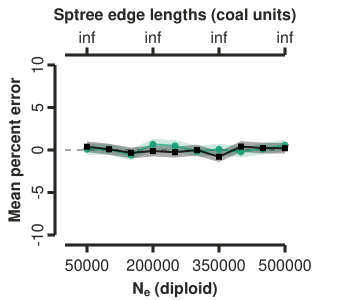

In [33]:
plot_error(npops=1, topo=False)

In [54]:
def plot_error(basename: str, topo: bool = False):
    """Plot the percent error for waiting distances between the analytical expectation
    and result of stochastic simulation, when data were simulated under either the
    full coalescent with recombination, or the SMC'.    
    """
    # load error dataframe
    fdata = load_errors(basename)
    npops = int(basename.split("npops")[1].split("-")[0])
    key = 'topo' if topo else 'tree'
    color = toytree.color.COLORS2[0]

    # setup canvas and axes
    canvas = toyplot.Canvas(width=350, height=300)
    axb = canvas.cartesian(margin=65)
    axt = axb.share("y")#, yscale="log")
    axb.x.label.text = "N<sub>e</sub> (diploid)"
    axt.x.label.text = "Sptree edge lengths (coal units)"
    axb.y.label.text = "Mean percent error"
    axb.x.domain.min = 0
    axb.y.domain.min = -10
    axb.y.domain.max = 10

    # style axes
    for ax in (axb.x, axt.x, axb.y):
        ax.domain.show = False
        ax.ticks.show = True
        ax.ticks.near = 7.5
        ax.ticks.far = 0
        ax.ticks.labels.offset = 12
        ax.ticks.labels.style["font-size"] = 16
        ax.label.offset = 35
        ax.label.style["font-size"] = 16
        ax.ticks.style["stroke-width"] = 3
        ax.spine.style["stroke-width"] = 3

    sptree = get_sptree(npops, SPECIES_TREE_HEIGHT)
    avgdist = np.min([i.dist for i in sptree if not i.is_root()])
    
    # modify x tick labels
    axb.x.ticks.locator = toyplot.locator.Explicit(
       np.linspace(NEFF_MIN, NEFF_MAX, 4),
    )
    if npops > 1:
        axt.x.ticks.locator = toyplot.locator.Explicit(
            np.linspace(NEFF_MIN, NEFF_MAX, 4),
            (avgdist / (2 * np.linspace(NEFF_MIN, NEFF_MAX, 4))).round(1),
        )
    else:
        axt.x.ticks.locator = toyplot.locator.Explicit(
            np.linspace(NEFF_MIN, NEFF_MAX, 4), ["inf"] * 4)
    axb.hlines([0], style={"stroke": "grey", "stroke-width": 2, "stroke-dasharray": "6,6", "stroke-opacity": 0.7})

    # plot data
    axb.fill(
       fdata.index,
       fdata[f"fullsim_minus_prediction_{key}_error_perc"] - 2*fdata[f"fullsim_minus_prediction_{key}_error_perc_sem"], 
       fdata[f"fullsim_minus_prediction_{key}_error_perc"] + 2*fdata[f"fullsim_minus_prediction_{key}_error_perc_sem"], 
       opacity=0.33,
    )
    axb.fill(
       fdata.index,
       fdata[f"smcsim_minus_prediction_{key}_error_perc"] - 2*fdata[f"smcsim_minus_prediction_{key}_error_perc_sem"], 
       fdata[f"smcsim_minus_prediction_{key}_error_perc"] + 2*fdata[f"smcsim_minus_prediction_{key}_error_perc_sem"], 
       opacity=0.33, color='black',
    )
    style = dict(opacity=0.8, color='black', mstyle={"stroke": "none"})
    marks = [
        axb.plot(fdata.index,
                 fdata[f"fullsim_minus_prediction_{key}_error_perc"], 
                 size=6, marker="o", color=color, opacity=0.7),
        axb.plot(fdata.index,
                 fdata[f"smcsim_minus_prediction_{key}_error_perc"], 
                 size=6, marker='s', **style),
    ]
    canvas.legend(*marks)
    return canvas

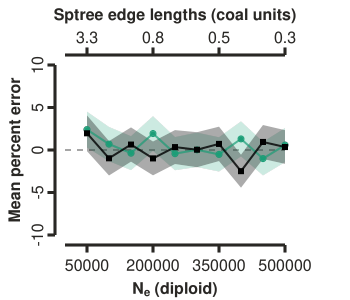

In [62]:
plot_error("10K-npops8-nsamps3", topo=True)

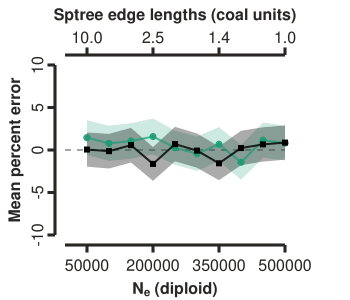

In [61]:
plot_error("10K-npops2-nsamps8", topo=True)

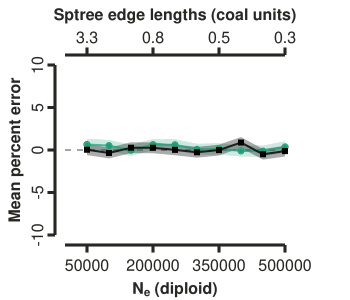

In [35]:
plot_error(npops=8, topo=False)

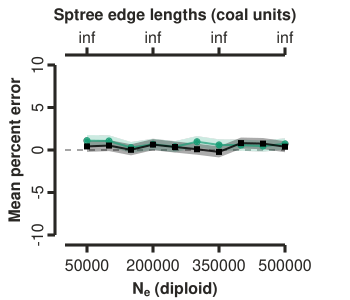

In [36]:
plot_error(npops=1, topo=True)

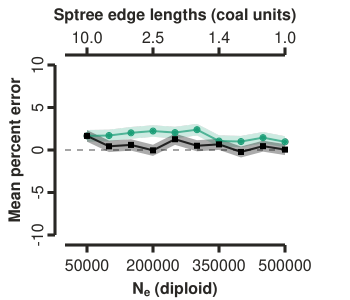

In [37]:
plot_error(npops=2, topo=True)

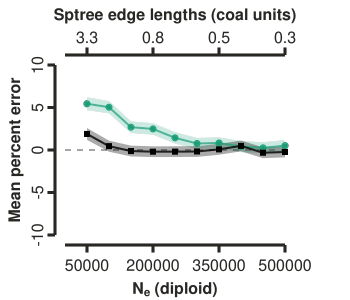

In [38]:
plot_error(npops=8, topo=True)

## Plot data distributions

In [108]:
def load_data(path):
    """Return large array results summarized into a dataframe.
    
    # 0 = smc_tree_probs
    # 1 = smc_topo_probs
    # 2 = smc_tree_dists
    # 3 = smc_topo_dists
    # 4 = sim_tree_dists
    # 5 = sim_topo_dists
    # 6 = sum_edge_lengths of genealogy 0
    # 7 = event type
    """
    results = np.load(path)  
    
    newdata = pd.DataFrame(
        data={
            'tree_smc_prob': results[:, :, 0].mean(axis=0),
            'topo_smc_prob': results[:, :, 1].mean(axis=0),
            'tree_smc_dist': results[:, :, 2].mean(axis=0),
            'topo_smc_dist': results[:, :, 3].mean(axis=0),       
            'tree_sim_prob': (results[:, :, 7] != 0).mean(0),
            'topo_sim_prob': (results[:, :, 7] == 2).mean(0),
            'tree_sim_dist': results[:, :, 4].mean(axis=0),
            'topo_sim_dist': results[:, :, 5].mean(axis=0),

            'tree_smc_prob_CI95':  tuple(zip(
                np.percentile(results[:, :, 0], 2.5, axis=0).round(5),
                np.percentile(results[:, :, 0], 97.5, axis=0).round(5),
            )),
            'topo_smc_prob_CI95':  tuple(zip(
                np.percentile(results[:, :, 1], 2.5, axis=0).round(5),
                np.percentile(results[:, :, 1], 97.5, axis=0).round(5),
            )),

            'tree_smc_dist_CI95':  tuple(zip(
                np.percentile(results[:, :, 2], 2.5, axis=0).round(5),
                np.percentile(results[:, :, 2], 97.5, axis=0).round(5),
            )),
            'topo_smc_dist_CI95':  tuple(zip(
                np.percentile(results[:, :, 3], 2.5, axis=0).round(5),
                np.percentile(results[:, :, 3], 97.5, axis=0).round(5),
            )),
            'tmrca': results[:, :, 6].mean(axis=0),
        },
        index=np.linspace(NEFF_MIN, NEFF_MAX, NEFF_VALS).astype(int),
    )
    newdata['nsamples'] = NLOCI * NREPS
    return newdata

In [109]:
data = load_data("../batch-scripts/validate-npops2-smc.npy")
data

,tree_smc_prob,topo_smc_prob,tree_smc_dist,topo_smc_dist,tree_sim_prob,topo_sim_prob,tree_sim_dist,topo_sim_dist,tree_smc_prob_CI95,topo_smc_prob_CI95,tree_smc_dist_CI95,topo_smc_dist_CI95,tmrca,nsamples
50000,0.477290,0.110803,679.141772,3672.222191,0.4856,0.1150,677.4834,3537.6352,"(0.35242, 0.58976)","(0.03369, 0.23827)","(400.42583, 1113.22528)","(1122.57645, 9813.84381)",1.631842e+06,100000
100000,0.646617,0.224734,362.786825,1320.337369,0.6442,0.2303,357.7984,1268.9563,"(0.53723, 0.72442)","(0.07432, 0.44406)","(219.48684, 580.77779)","(409.47429, 3440.75597)",2.264017e+06,100000
150000,0.709564,0.312711,261.525105,704.945132,0.7067,0.3081,264.9955,699.3117,"(0.61268, 0.77822)","(0.11177, 0.52051)","(154.97858, 421.04427)","(277.89591, 1798.3154)",2.891153e+06,100000
200000,0.741459,0.367314,209.518965,476.541160,0.7388,0.3692,210.9816,475.0481,"(0.64198, 0.81001)","(0.14796, 0.56044)","(122.17201, 342.00731)","(219.51723, 1150.41146)",3.481637e+06,100000
250000,0.758921,0.401410,174.975339,362.509325,0.7581,0.4030,178.9896,363.1672,"(0.65086, 0.82934)","(0.16854, 0.59892)","(99.93838, 288.46189)","(180.49298, 828.30456)",4.098073e+06,100000
300000,0.771254,0.423255,152.244731,298.974326,0.7739,0.4261,150.7692,295.4857,"(0.65771, 0.8422)","(0.18389, 0.61793)","(86.253, 253.55178)","(153.52919, 638.70719)",4.662948e+06,100000
350000,0.778190,0.433691,134.980399,258.364130,0.7778,0.4333,136.4514,258.8952,"(0.656, 0.85108)","(0.19011, 0.63392)","(76.48014, 228.81358)","(136.88978, 514.06225)",5.238202e+06,100000
400000,0.784235,0.443746,121.397465,227.451184,0.7812,0.4466,121.7994,226.0244,"(0.66071, 0.86061)","(0.20033, 0.64455)","(67.40979, 204.90814)","(120.78489, 443.08264)",5.802566e+06,100000
450000,0.788191,0.448644,110.362160,205.464046,0.7897,0.4566,110.6283,203.6461,"(0.65991, 0.86398)","(0.19999, 0.65545)","(60.83681, 188.66768)","(108.16875, 393.99836)",6.366234e+06,100000
500000,0.792437,0.453498,101.891768,187.738477,0.7936,0.4566,102.7821,187.2475,"(0.66255, 0.86923)","(0.20403, 0.66306)","(55.3629, 177.42679)","(99.42108, 352.90578)",6.898625e+06,100000


# Plot results

### Plot probabilities

In [110]:
def plot_probs(data, topo: bool=False, smc: bool=False):
    """Plot probabilities of tree or topology change.
    
    """      
    smckey = "topo_smc_" if topo else "tree_smc_"
    simkey = "topo_sim_" if topo else "tree_sim_"
    color = toytree.color.COLORS2[0]
    canvas = toyplot.Canvas(width=350, height=300)
    
    # setup axes
    axb = canvas.cartesian(margin=65)
    axt = axb.share("y")
    axb.x.label.text = "N<sub>e</sub> (diploid)"
    axt.x.label.text = "Sptree edge lengths (coal units)"
    axb.y.label.text = "P(topo-change | S,G)" if topo else "P(tree-change | S,G)"
    axb.y.domain.max = 1
    axb.y.domain.min = 0
    axb.x.domain.min = 0
    
    # style axes
    for ax in (axb.x, axt.x, axb.y):
        ax.domain.show = False
        ax.ticks.show = True
        ax.ticks.near = 7.5
        ax.ticks.far = 0
        ax.ticks.labels.offset = 12
        ax.ticks.labels.style["font-size"] = 16
        ax.label.offset = 35
        ax.label.style["font-size"] = 16
        ax.ticks.style["stroke-width"] = 3
        ax.spine.style["stroke-width"] = 3
        
    avgdist = np.min([i.dist for i in sptree if not i.is_root()])
    axb.x.ticks.locator = toyplot.locator.Explicit(
        np.linspace(50_000, 500_000, 4),
        #np.linspace(0.5, 5, 5),
    )
    axt.x.ticks.locator = toyplot.locator.Explicit(
        np.linspace(50_000, 500_000, 4),
        (avgdist / (2 * np.linspace(50_000, 500_000, 4))).round(1),
    )
        
    # plot data
    cmap = toyplot.color.brewer.palette("BlueRed", NEFF_VALS)
    axb.hlines([0, 0.5, 1.0], style={"stroke": "grey", "stroke-width": 2, "stroke-dasharray": "6,6", "stroke-opacity": 0.7})
    axb.fill(
       data.index,
       [i[0] for i in data[smckey + "prob_CI95"]],
       [i[1] for i in data[smckey + "prob_CI95"]],
       opacity=0.25,
       color="grey",
    )
    axb.plot(data.index, data[simkey + "prob"], stroke_width=2, color='black')
    style = dict(opacity=0.8, color='black', mstyle={"stroke": "none"})
    marks = [
        axb.scatterplot(data.index, data[smckey + "prob"], size=16,
                        color=[cmap[i] for i in range(NEFF_VALS)], 
                        mstyle={"stroke-width": 1.5, "fill-opacity": 0.5, "stroke": "black"}),
        axb.scatterplot(data.index, data[simkey + "prob"], size=6, marker='s', **style),
    ]
    return canvas

In [111]:
RESULTS_DICT

{'100K-npops1-full': PosixPath('../batch-scripts/validate-100K-npops1-full.npy'),
 '100K-npops1-smc': PosixPath('../batch-scripts/validate-100K-npops1-smc.npy'),
 '100K-npops2-full': PosixPath('../batch-scripts/validate-100K-npops2-full.npy'),
 '100K-npops2-smc': PosixPath('../batch-scripts/validate-100K-npops2-smc.npy'),
 '100K-npops8-full': PosixPath('../batch-scripts/validate-100K-npops8-full.npy'),
 '100K-npops8-smc': PosixPath('../batch-scripts/validate-100K-npops8-smc.npy')}

In [113]:
for nspecies in [1, 2, 8]:
    for smc in [True, False]:
        for topo in [True, False]:
            sptree = get_sptree(nspecies, 1e6)
            data = load_data(RESULTS_DICT[f"100K-npops{nspecies}-{'smc' if smc else 'full'}"])
            canvas = plot_probs(data, topo=topo, smc=smc)
            ttt = 'topo' if topo else 'tree'
            #toyplot.svg.render(canvas, 
            #    f"../manuscript/figures/alternatives/validation-colorprobs-{nspecies}pops-{ttt}-smc{int(smc)}-final.svg")


<svg class="toyplot-canvas-Canvas" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" width="350.0px" height="300.0px" viewBox="0 0 350.0 300.0" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" id="tae9d54bada334f39a0cfb4288eb92be6"> 50000 200000 350000 500000 N e (diploid) 0.0 0.5 1.0 P(topo-change | S,G) 10.0 2.5 1.4 1.0 Sptree edge lengths (coal units)

<svg class="toyplot-canvas-Canvas" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" width="350.0px" height="300.0px" viewBox="0 0 350.0 300.0" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" id="tc429c835ac564c1fbb9a6fffe334433d"> 50000 200000 350000 500000 N e (diploid) 0.0 0.5 1.0 P(tree-change | S,G) 10.0 2.5 1.4 1.0 Sptree edge lengths (coal units)

<svg class="toyplot-canvas-Canvas" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" width="350.0px" height="300.0px" viewBox="0 0 350.0 300.0" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" id="tb9dad677f49a4534b68106121a50e125"> 50000 200000 350000 500000 N e (diploid) 0.0 0.5 1.0 P(topo-change | S,G) 10.0 2.5 1.4 1.0 Sptree edge lengths (coal units)

<svg class="toyplot-canvas-Canvas" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" width="350.0px" height="300.0px" viewBox="0 0 350.0 300.0" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" id="tb6d252417b8440c0b46399a7f3463776"> 50000 200000 350000 500000 N e (diploid) 0.0 0.5 1.0 P(tree-change | S,G) 10.0 2.5 1.4 1.0 Sptree edge lengths (coal units)

<svg class="toyplot-canvas-Canvas" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" width="350.0px" height="300.0px" viewBox="0 0 350.0 300.0" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" id="t2e0eccdd6aa0491398aea2fe499130b8"> 50000 200000 350000 500000 N e (diploid) 0.0 0.5 1.0 P(topo-change | S,G) 10.0 2.5 1.4 1.0 Sptree edge lengths (coal units)

<svg class="toyplot-canvas-Canvas" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" width="350.0px" height="300.0px" viewBox="0 0 350.0 300.0" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" id="tdfb7498039d943a39012be45f3d3f937"> 50000 200000 350000 500000 N e (diploid) 0.0 0.5 1.0 P(tree-change | S,G) 10.0 2.5 1.4 1.0 Sptree edge lengths (coal units)

<svg class="toyplot-canvas-Canvas" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" width="350.0px" height="300.0px" viewBox="0 0 350.0 300.0" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" id="t3dbb3f1893774ac8b1948b7097799c6c"> 50000 200000 350000 500000 N e (diploid) 0.0 0.5 1.0 P(topo-change | S,G) 10.0 2.5 1.4 1.0 Sptree edge lengths (coal units)

<svg class="toyplot-canvas-Canvas" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" width="350.0px" height="300.0px" viewBox="0 0 350.0 300.0" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" id="tc31c9e98d0f24fe1aff41f9f42a99e04"> 50000 200000 350000 500000 N e (diploid) 0.0 0.5 1.0 P(tree-change | S,G) 10.0 2.5 1.4 1.0 Sptree edge lengths (coal units)

<svg class="toyplot-canvas-Canvas" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" width="350.0px" height="300.0px" viewBox="0 0 350.0 300.0" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" id="t00f47414d4304463bc74bd22bebe9fad"> 50000 200000 350000 500000 N e (diploid) 0.0 0.5 1.0 P(topo-change | S,G) 3.3 0.8 0.5 0.3 Sptree edge lengths (coal units)

<svg class="toyplot-canvas-Canvas" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" width="350.0px" height="300.0px" viewBox="0 0 350.0 300.0" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" id="t4c616a024cd04c46990098b8fb353c18"> 50000 200000 350000 500000 N e (diploid) 0.0 0.5 1.0 P(tree-change | S,G) 3.3 0.8 0.5 0.3 Sptree edge lengths (coal units)

<svg class="toyplot-canvas-Canvas" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" width="350.0px" height="300.0px" viewBox="0 0 350.0 300.0" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" id="tab8eb29ededd494f863f0e341d8cb42c"> 50000 200000 350000 500000 N e (diploid) 0.0 0.5 1.0 P(topo-change | S,G) 3.3 0.8 0.5 0.3 Sptree edge lengths (coal units)

<svg class="toyplot-canvas-Canvas" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" width="350.0px" height="300.0px" viewBox="0 0 350.0 300.0" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" id="t6019820389ce450ebd041577f5466ff9"> 50000 200000 350000 500000 N e (diploid) 0.0 0.5 1.0 P(tree-change | S,G) 3.3 0.8 0.5 0.3 Sptree edge lengths (coal units)

## Plot distances

In [114]:
def plot_distances(data, topo: bool=False, log: bool=True, smc: bool=False):
    """Plot waiting distances until tree or topology change.
    
    """
    smckey = "topo_smc_" if topo else "tree_smc_"
    simkey = "topo_sim_" if topo else "tree_sim_"
    color = toytree.color.COLORS2[0]
    canvas = toyplot.Canvas(width=350, height=300)
    
    # setup axes
    axb = canvas.cartesian(margin=65)
    axt = axb.share("y")#, yscale="log")
    axb.x.label.text = "N<sub>e</sub> (diploid)"
    axt.x.label.text = "Sptree edge lengths (coal units)"
    axb.y.label.text = "Distance to topo-change" if topo else "Distance to tree-change"
    axb.x.domain.min = 0
        
    if log:
        axt.y.scale = "log"
        axb.y.domain.min = 50
        axb.y.domain.max = 1e4
    else:
        axb.y.domain.min = 10
        axb.y.domain.max = 10000
    
    # style axes
    for ax in (axb.x, axt.x, axb.y):
        ax.domain.show = False
        ax.ticks.show = True
        ax.ticks.near = 7.5
        ax.ticks.far = 0
        ax.ticks.labels.offset = 12
        ax.ticks.labels.style["font-size"] = 16
        ax.label.offset = 35
        ax.label.style["font-size"] = 16
        ax.ticks.style["stroke-width"] = 3
        ax.spine.style["stroke-width"] = 3

    avgdist = np.min([i.dist for i in sptree if not i.is_root()])
    axb.x.ticks.locator = toyplot.locator.Explicit(
        np.linspace(NEFF_MIN, NEFF_MAX, 4),
    )
    axt.x.ticks.locator = toyplot.locator.Explicit(
        np.linspace(NEFF_MIN, NEFF_MAX, 4),
        (avgdist / (2 * np.linspace(NEFF_MIN, NEFF_MAX, 4))).round(1),
    )
    axt.y.ticks.locator = toyplot.locator.Explicit([100, 1000, 10000])

    axb.hlines([100, 1000, 10000], style={"stroke": "grey", "stroke-width": 2, "stroke-dasharray": "6,6", "stroke-opacity": 0.7})

    # plot data
    cmap = toyplot.color.brewer.palette("BlueRed", NEFF_VALS)
    axb.fill(
       data.index,
       [i[0] for i in data[smckey + "dist_CI95"]],
       [i[1] for i in data[smckey + "dist_CI95"]],
       opacity=0.25, color="grey",
    )
    axb.plot(data.index, data[simkey + "dist"], stroke_width=3, color='black')#color)
    style = dict(opacity=0.8, color='black', mstyle={"stroke": "none"})
    marks = [
        axb.scatterplot(data.index, data[smckey + "dist"], 
                        size=16, marker="o", 
                        color=[cmap[i] for i in range(NEFF_VALS)], 
                        #opacity=0.5, 
                        mstyle={"stroke": "black", "stroke-width": 1.5, "fill-opacity": 0.5},
                       ),
        axb.scatterplot(data.index, data[simkey + "dist"], size=7, marker='s', **style),
    ]
    return canvas

In [115]:
for nspecies in [1, 2, 8]:
    for smc in [True, False]:
        for topo in [True, False]:
            #data = load_data(f"./validation_full_{nspecies}pops.npy")
            sptree = get_sptree(nspecies, 1e6)
            data = load_data(RESULTS_DICT[f"100K-npops{nspecies}-{'smc' if smc else 'full'}"])
            canvas = plot_distances(data, topo=topo, log=True, smc=smc)
            ttt = 'topo' if topo else 'tree'
            #toyplot.svg.render(canvas, 
            #   f"../manuscript/figures/alternatives/validation-colordists-{nspecies}pops-{ttt}-smc{int(smc)}-final.svg")


<svg class="toyplot-canvas-Canvas" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" width="350.0px" height="300.0px" viewBox="0 0 350.0 300.0" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" id="t6834a43c32844b119bb2e247ddeb9cd6"> <polygon points="87.0,131.473011172408 109.0,153.63113411629962 131.0,166.83182116505714 153.0,175.96434403691683 175.0,183.08467869486657 197.0,188.88813718856852 219.0,193.9975559878216 241.0,198.225957520074 263.0,202.03237798520658 285.0,205.31466304181873 285.0,153.4936698108155 263.0,150.11680323879938 241.0,146.23101229621426 219.0,142.43303346672806 197.0,137.05403423285017 175.0,131.3693376725261 153.0,124.12931327871193 131.0,115.17822273879985 109.0,101.60829991615347 87.0,79.57844337504635" style="fill:rgb(50.2%,50.2%,50.2%);fill-opacity:1.0;opacity:0.25;stroke:none"> 50000 200000 350000 500000 N e (diploid) 100 1000 10000 Distance to topo-change 10.0 2.5 1.4 1.0 Sptree edge lengths (coal units)

<svg class="toyplot-canvas-Canvas" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" width="350.0px" height="300.0px" viewBox="0 0 350.0 300.0" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" id="tddf2b11476e1407498199f454644c9dc"> <polygon points="87.0,152.9953363543543 109.0,175.3845144476109 131.0,188.27745943463668 153.0,197.29406226458832 175.0,204.7300674061901 197.0,210.47831209859623 219.0,215.4004483564543 241.0,219.75128797910804 263.0,223.5643952128606 285.0,226.7297945097186 285.0,177.24294959712182 263.0,173.83824184412663 241.0,170.07794310064102 219.0,165.91208094371808 197.0,160.72306879497688 175.0,154.86952127824128 153.0,147.97952468473346 131.0,138.64002774602343 109.0,125.64889306329545 87.0,103.37101426316795" style="fill:rgb(50.2%,50.2%,50.2%);fill-opacity:1.0;opacity:0.25;stroke:none"> 50000 200000 350000 500000 N e (diploid) 100 1000 10000 Distance to tree-change 10.0 2.5 1.4 1.0 Sptree edge lengths (coal units)

<svg class="toyplot-canvas-Canvas" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" width="350.0px" height="300.0px" viewBox="0 0 350.0 300.0" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" id="t8717995cc26b47dd9541a3354587f895"> <polygon points="87.0,131.4793264322335 109.0,153.69745415761906 131.0,166.65485015489412 153.0,175.97323485689068 175.0,182.99715652004838 197.0,188.83845397266455 219.0,193.79174408623783 241.0,198.21194309518538 263.0,201.93097499052772 285.0,205.22972341754286 285.0,153.4009399119022 263.0,150.0687638341322 241.0,146.47467666914287 219.0,142.24905187679417 197.0,137.21719876377728 175.0,131.4712213403649 153.0,124.35330074379132 131.0,114.85552469672561 109.0,101.9515855319074 87.0,79.39703098757518" style="fill:rgb(50.2%,50.2%,50.2%);fill-opacity:1.0;opacity:0.25;stroke:none"> 50000 200000 350000 500000 N e (diploid) 100 1000 10000 Distance to topo-change 10.0 2.5 1.4 1.0 Sptree edge lengths (coal units)

<svg class="toyplot-canvas-Canvas" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" width="350.0px" height="300.0px" viewBox="0 0 350.0 300.0" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" id="t7309acb9b4c749c48c0ccffa606e80fa"> <polygon points="87.0,152.95163362201257 109.0,175.10915878052904 131.0,188.3701457373394 153.0,197.43100965503996 175.0,204.59119494445372 197.0,210.5009417250619 219.0,215.26875655485185 241.0,219.803436081465 263.0,223.45048414393275 285.0,226.75965701602735 285.0,177.38869629265827 263.0,173.86063214103095 241.0,169.94129326597604 219.0,166.0985065136268 197.0,161.09943333942243 175.0,155.15896984312073 153.0,147.99588769768195 131.0,138.80761931326253 109.0,125.8436198844019 87.0,103.57179342104615" style="fill:rgb(50.2%,50.2%,50.2%);fill-opacity:1.0;opacity:0.25;stroke:none"> 50000 200000 350000 500000 N e (diploid) 100 1000 10000 Distance to tree-change 10.0 2.5 1.4 1.0 Sptree edge lengths (coal units)

<svg class="toyplot-canvas-Canvas" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" width="350.0px" height="300.0px" viewBox="0 0 350.0 300.0" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" id="tbc60f1f877e4429a8bb087941b693173"> <polygon points="87.0,130.5626479618996 109.0,171.540585055779 131.0,181.83610916278315 153.0,191.1548960810791 175.0,197.60641464278575 197.0,202.57920803817578 219.0,207.02931411672975 241.0,210.6935134900171 263.0,214.00629028868084 285.0,216.99517193220746 285.0,170.79876204224263 263.0,166.07744041536318 241.0,160.66914287314358 219.0,154.73237697601058 197.0,147.35961897773512 175.0,137.93211313279485 153.0,127.10988092357779 131.0,112.21340084030888 109.0,93.05710716669904 87.0,67.53303752923868" style="fill:rgb(50.2%,50.2%,50.2%);fill-opacity:1.0;opacity:0.25;stroke:none"> 50000 200000 350000 500000 N e (diploid) 100 1000 10000 Distance to topo-change 10.0 2.5 1.4 1.0 Sptree edge lengths (coal units)

<svg class="toyplot-canvas-Canvas" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" width="350.0px" height="300.0px" viewBox="0 0 350.0 300.0" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" id="t2d8ab508e7914952bb90568f8c622d3e"> <polygon points="87.0,170.0406623527624 109.0,191.76701234950062 131.0,202.99077205762595 153.0,210.5825827605309 175.0,216.45786889556845 197.0,221.35010215346927 219.0,225.3979336918701 241.0,229.11524536336026 263.0,232.24431169762133 285.0,235.00613537688443 285.0,201.9602615950548 263.0,199.5274233644696 241.0,197.0306683503615 219.0,194.06293609778785 197.0,190.59951067839293 175.0,185.77557355338632 153.0,179.76879841419932 131.0,171.17288272614317 109.0,158.34120449834833 87.0,136.07890491969695" style="fill:rgb(50.2%,50.2%,50.2%);fill-opacity:1.0;opacity:0.25;stroke:none"> 50000 200000 350000 500000 N e (diploid) 100 1000 10000 Distance to tree-change 10.0 2.5 1.4 1.0 Sptree edge lengths (coal units)

<svg class="toyplot-canvas-Canvas" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" width="350.0px" height="300.0px" viewBox="0 0 350.0 300.0" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" id="t4188e53c7e9e4326bb338f764b688022"> <polygon points="87.0,130.4888049993776 109.0,171.27404702438437 131.0,181.63674484297553 153.0,191.09899301229282 175.0,197.47044943682616 197.0,202.68083236626987 219.0,207.04807106721822 241.0,210.64386153996452 263.0,213.9437510277522 285.0,216.75127642740696 285.0,170.66570406622196 263.0,165.86312625690906 241.0,160.70204164911277 219.0,154.22092438614314 197.0,146.93077225221282 175.0,138.02301527200984 153.0,126.47795510618444 131.0,112.13227300505255 109.0,92.86386436274123 87.0,67.60107930273726" style="fill:rgb(50.2%,50.2%,50.2%);fill-opacity:1.0;opacity:0.25;stroke:none"> 50000 200000 350000 500000 N e (diploid) 100 1000 10000 Distance to topo-change 10.0 2.5 1.4 1.0 Sptree edge lengths (coal units)

<svg class="toyplot-canvas-Canvas" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" width="350.0px" height="300.0px" viewBox="0 0 350.0 300.0" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" id="tf2df04324bf24ba38815ea2a739a118d"> <polygon points="87.0,170.028048820044 109.0,191.87387706692485 131.0,202.92919458085663 153.0,210.53761945806679 175.0,216.42272553116163 197.0,221.19765564509717 219.0,225.41458902105566 241.0,229.05925337140974 263.0,232.25398288980543 285.0,235.00426896482415 285.0,201.84412003163277 263.0,199.50263884720263 241.0,197.1380005538002 219.0,193.98946477985922 197.0,190.38607912973242 175.0,185.79711645902245 153.0,179.6392435670105 131.0,171.25288870773332 109.0,158.29014373794135 87.0,136.00305158135143" style="fill:rgb(50.2%,50.2%,50.2%);fill-opacity:1.0;opacity:0.25;stroke:none"> 50000 200000 350000 500000 N e (diploid) 100 1000 10000 Distance to tree-change 10.0 2.5 1.4 1.0 Sptree edge lengths (coal units)

<svg class="toyplot-canvas-Canvas" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" width="350.0px" height="300.0px" viewBox="0 0 350.0 300.0" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" id="tbba705e076314ef69433a910e4fc8eb8"> <polygon points="87.0,157.92955706712476 109.0,182.77892229966469 131.0,195.81031522856298 153.0,203.44600618720162 175.0,208.8043174950297 197.0,212.92933246479728 219.0,216.54726084318665 241.0,219.5195778272119 263.0,222.2650728592971 285.0,224.52581157026975 285.0,199.57950516500142 263.0,196.82614616332228 241.0,193.8074096277167 219.0,189.81043594521128 197.0,184.80850985895617 175.0,177.84918407692007 153.0,167.343960763518 131.0,151.93619566421873 109.0,125.63148761504607 87.0,62.89629773873924" style="fill:rgb(50.2%,50.2%,50.2%);fill-opacity:1.0;opacity:0.25;stroke:none"> 50000 200000 350000 500000 N e (diploid) 100 1000 10000 Distance to topo-change 3.3 0.8 0.5 0.3 Sptree edge lengths (coal units)

<svg class="toyplot-canvas-Canvas" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" width="350.0px" height="300.0px" viewBox="0 0 350.0 300.0" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" id="t2968253a28cc432bba6da62a19b4d619"> <polygon points="87.0,188.96307401081796 109.0,204.3538306337779 131.0,213.28555206627962 153.0,219.63634280902482 175.0,224.47627791150592 197.0,228.48044844688673 219.0,232.12979860646237 241.0,235.00321889447233 263.0,235.07413144723617 285.0,235.1305051557789 285.0,217.1168886084303 263.0,215.55528207712862 241.0,213.84577045300512 219.0,211.83162033605655 197.0,209.54603872382972 175.0,206.78903677639832 153.0,203.41336362474615 131.0,198.78547555411254 109.0,191.4988303380093 87.0,176.92772411692613" style="fill:rgb(50.2%,50.2%,50.2%);fill-opacity:1.0;opacity:0.25;stroke:none"> 50000 200000 350000 500000 N e (diploid) 100 1000 10000 Distance to tree-change 3.3 0.8 0.5 0.3 Sptree edge lengths (coal units)

<svg class="toyplot-canvas-Canvas" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" width="350.0px" height="300.0px" viewBox="0 0 350.0 300.0" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" id="tc3a4ea73eca84176b90c82bba423d9a7"> <polygon points="87.0,154.90954805115462 109.0,182.6233548198447 131.0,195.74378493157965 153.0,203.37884045153385 175.0,208.68222676300482 197.0,212.96028688844666 219.0,216.51386972206546 241.0,219.5622266477286 263.0,222.147931121951 285.0,224.57296428827644 285.0,199.53058650900144 263.0,196.88353516027192 241.0,193.61151965990558 219.0,189.70657709070395 197.0,184.62779161319844 175.0,177.95019122878773 153.0,167.32576572810387 131.0,151.81029266450557 109.0,125.56538729134746 87.0,63.18972692409883" style="fill:rgb(50.2%,50.2%,50.2%);fill-opacity:1.0;opacity:0.25;stroke:none"> 50000 200000 350000 500000 N e (diploid) 100 1000 10000 Distance to topo-change 3.3 0.8 0.5 0.3 Sptree edge lengths (coal units)

<svg class="toyplot-canvas-Canvas" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" width="350.0px" height="300.0px" viewBox="0 0 350.0 300.0" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" id="t97afa410ac004d0798db1e349e9a448e"> <polygon points="87.0,188.8254752747383 109.0,204.32445739975256 131.0,213.2969304128344 153.0,219.5989357334389 175.0,224.50949546222006 197.0,228.59023408050402 219.0,231.98485198103307 241.0,235.00016743718592 263.0,235.07210118592963 285.0,235.12855365829148 285.0,217.11578238302184 263.0,215.478080881164 241.0,213.78971491092742 219.0,211.7890850035458 197.0,209.51004740348685 175.0,206.76548461771483 153.0,203.39927523679737 131.0,198.79963896597963 109.0,191.50632873814942 87.0,176.8985973044842" style="fill:rgb(50.2%,50.2%,50.2%);fill-opacity:1.0;opacity:0.25;stroke:none"> 50000 200000 350000 500000 N e (diploid) 100 1000 10000 Distance to tree-change 3.3 0.8 0.5 0.3 Sptree edge lengths (coal units)

## Plot error

In [119]:
def plot_error(fullpath, smcpath, topo:bool=False):
    """Plot the percent error for waiting distances between the analytical expectation
    and result of stochastic simulation, when data were simulated under either the
    full coalescent with recombination, or the SMC'.    
    """
    
    fdata = load_errors(fullpath, smcpath)
    key = 'topo' if topo else 'tree'
    color = toytree.color.COLORS2[0]
    canvas = toyplot.Canvas(width=350, height=300)

    # setup axes
    axb = canvas.cartesian(margin=65)
    axt = axb.share("y")#, yscale="log")
    axb.x.label.text = "N<sub>e</sub> (diploid)"
    axt.x.label.text = "Sptree edge lengths (coal units)"
    axb.y.label.text = "Mean percent error"
    axb.x.domain.min = 0
    axb.y.domain.min = -10
    axb.y.domain.max = 10

    # style axes
    for ax in (axb.x, axt.x, axb.y):
        ax.domain.show = False
        ax.ticks.show = True
        ax.ticks.near = 7.5
        ax.ticks.far = 0
        ax.ticks.labels.offset = 12
        ax.ticks.labels.style["font-size"] = 16
        ax.label.offset = 35
        ax.label.style["font-size"] = 16
        ax.ticks.style["stroke-width"] = 3
        ax.spine.style["stroke-width"] = 3

    sptree = get_sptree(nspecies, 1e6)
    avgdist = np.min([i.dist for i in sptree if not i.is_root()])
    axb.x.ticks.locator = toyplot.locator.Explicit(
        np.linspace(NEFF_MIN, NEFF_MAX, 4),
    )
    axt.x.ticks.locator = toyplot.locator.Explicit(
        np.linspace(NEFF_MIN, NEFF_MAX, 4),
        (avgdist / (2 * np.linspace(NEFF_MIN, NEFF_MAX, 4))).round(1),
    )

    axb.hlines([0], style={"stroke": "grey", "stroke-width": 2, "stroke-dasharray": "6,6", "stroke-opacity": 0.7})

    # plot data
    axb.fill(
       fdata.index,
       fdata[f"fullsim_minus_prediction_{key}_error_perc"] - 2*fdata[f"fullsim_minus_prediction_{key}_error_perc_sem"], 
       fdata[f"fullsim_minus_prediction_{key}_error_perc"] + 2*fdata[f"fullsim_minus_prediction_{key}_error_perc_sem"], 
       opacity=0.33,
    )
    axb.fill(
       data.index,
       fdata[f"smcsim_minus_prediction_{key}_error_perc"] - 2*fdata[f"smcsim_minus_prediction_{key}_error_perc_sem"], 
       fdata[f"smcsim_minus_prediction_{key}_error_perc"] + 2*fdata[f"smcsim_minus_prediction_{key}_error_perc_sem"], 
       opacity=0.33, color='black',
    )
    style = dict(opacity=0.8, color='black', mstyle={"stroke": "none"})
    marks = [
        axb.plot(fdata.index, fdata[f"fullsim_minus_prediction_{key}_error_perc"], 
                 size=6, marker="o", color=color, opacity=0.7),
        axb.plot(fdata.index, fdata[f"smcsim_minus_prediction_{key}_error_perc"], 
                 size=6, marker='s', **style),
    ]
    return canvas

In [120]:
nspecies = 8
for nspecies in [1, 2, 8]:
    for topo in [True, False]:
        sptree = get_sptree(nspecies, 1e6)
        canvas = plot_error(RESULTS_DICT["100K-npops8-full"], RESULTS_DICT["100K-npops8-smc"], topo)
        #toyplot.svg.render(canvas, f"../manuscript/figures/alternatives/error-{nspecies}-{topo}-final.svg")

TypeError: tuple indices must be integers or slices, not str

<svg class="toyplot-canvas-Canvas" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" width="350.0px" height="300.0px" viewBox="0 0 350.0 300.0" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" id="t1c1bd601af454c159deae83b6e36b367"> 50000 200000 350000 500000 N e (diploid) -10 -5 0 5 10 Mean percent error 10.0 2.5 1.4 1.0 Sptree edge lengths (coal units)

## Plot genealogy lengths

In [165]:
data = np.load("./validation-final_8pops_full.npy")
data[:, 2, 6]

array([5669222.07894874, 5894744.26263116, 5693098.48798255, ...,
       5947432.69402314, 5412054.39962098, 7632191.31217912])

In [182]:
cmap = toyplot.color.brewer.palette("BlueRed", 10)
cmap

In [262]:
def plot_distribution_of_genealogy_lens(ntips: int):
    
    data = np.load(f"./validation-final_{ntips}pops_full.npy")

    canvas = toyplot.Canvas(width=350, height=300)
    axes = canvas.cartesian(
        xlabel="Genealogy sum length (x10<sup>6</sup>)",
        ylabel="Frequency",
        margin=65)
    
    cmap = toyplot.color.brewer.palette("BlueRed", 10)
    max_height = 24e6
    nes = np.linspace(NEFF_MIN, NEFF_MAX, NEFF_VALS).astype(int)
    nes = nes[[0, -1]]

    # ...
    axes.x.domain.min = 0
    axes.x.domain.max = max_height
    for ax in (axes.x, axes.y):
        ax.domain.show = False
        ax.ticks.show = True
        ax.ticks.near = 7.5
        ax.ticks.far = 0
        ax.ticks.labels.offset = 12
        ax.ticks.labels.style["font-size"] = 16
        ax.label.offset = 35
        ax.label.style["font-size"] = 16
        ax.ticks.style["stroke-width"] = 3
        ax.spine.style["stroke-width"] = 3
    axes.y.ticks.locator = toyplot.locator.Explicit(np.linspace(0.25, NEFF_VALS * 0.25, NEFF_VALS), [""] * NEFF_VALS)
    axes.x.ticks.locator = toyplot.locator.Explicit(
        np.linspace(0, max_height, 4),
        [int(i / 1e6) for i in np.linspace(0, max_height, 4)],
    )
    axes.vlines(
        np.linspace(0, max_height, 4), 
        style={"stroke": "grey", "stroke-width": 2, "stroke-dasharray": "6,6", "stroke-opacity": 0.7},
    )
    
    offset = NEFF_VALS * 0.25
    for nidx in range(NEFF_VALS):
        sumlens = data[:, nidx, 6]
        mag, pos = np.histogram(sumlens, bins=40)
        axes.fill(
            pos[:-1],
            np.repeat(offset, mag.size),
            offset + (mag/mag.max()), 
            style={'stroke': "none", "fill-opacity": 0.33, "fill": cmap[nidx]},
        )
        axes.plot(
            pos[:-1], 
            offset + (mag/mag.max()), 
            #color='black',
            color='black',#cmap[nidx],
            stroke_width=2, 
            style={"stroke-opacity": 0.7}
        )
        offset -= 0.25
        
    return canvas

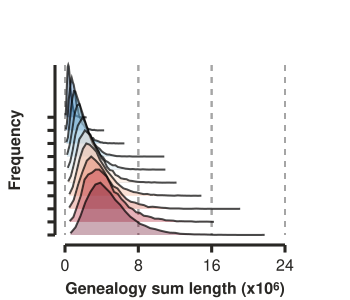

In [263]:
c = plot_distribution_of_genealogy_lens(1)
toyplot.svg.render(c, "../manuscript/figures/alternatives/genealogy-sumlens-1pops-color.svg")
c

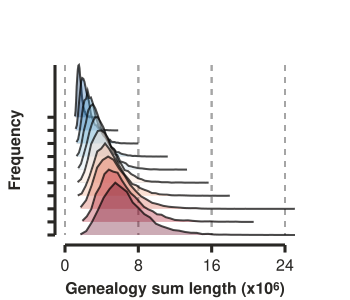

In [264]:
c = plot_distribution_of_genealogy_lens(2)
toyplot.svg.render(c, "../manuscript/figures/alternatives/genealogy-sumlens-2pops-color.svg")
c

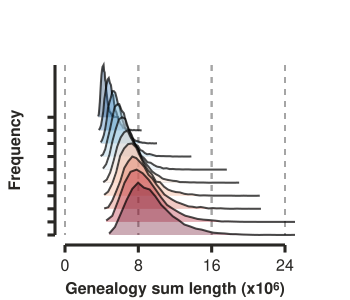

In [265]:
c = plot_distribution_of_genealogy_lens(8)
toyplot.svg.render(c, "../manuscript/figures/alternatives/genealogy-sumlens-8pops-color.svg")
c